# Adult Census Income

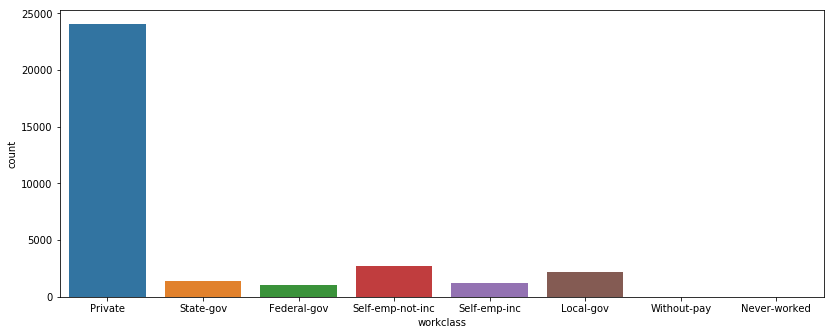

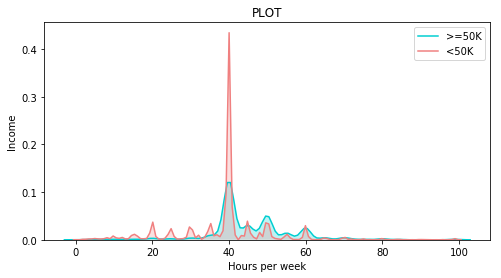

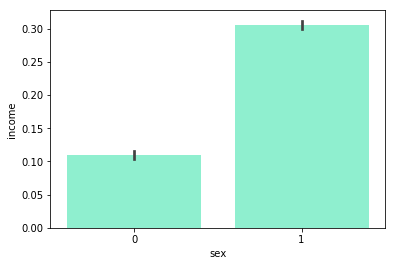

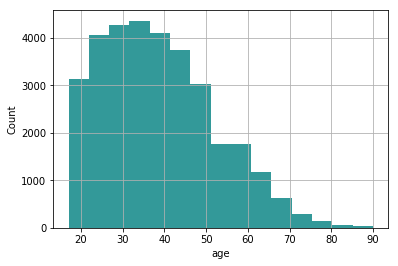

With Logistic Regression
With Random Forest


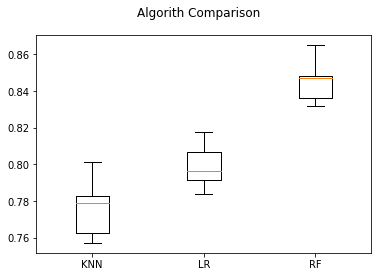

Accuracy: 84.33853334971134%
[[5710  510]
 [ 765 1156]]
              precision    recall  f1-score   support

           0       0.88      0.92      0.90      6220
           1       0.69      0.60      0.64      1921

   micro avg       0.84      0.84      0.84      8141
   macro avg       0.79      0.76      0.77      8141
weighted avg       0.84      0.84      0.84      8141



In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns

fig,ax=plt.subplots()
fig.set_size_inches(13.7,5.27)

data=pd.read_csv('adult.csv',na_values=["?"])
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data1=data
data1.income=le.fit_transform(data1.income)

le=LabelEncoder()
data1=data
data1.sex=le.fit_transform(data1.sex)

le=LabelEncoder()
data1=data
data1['marital.status']=le.fit_transform(data1['marital.status'])

y=data['income']
data.drop('income',axis=1,inplace=True)

data['workclass'].fillna(method='bfill',inplace=True)
data['occupation'].fillna(method='bfill',inplace=True)
data['native.country'].fillna(method='bfill',inplace=True)

data.isnull().sum()


sns.countplot(x='workclass',data=data)
plt.show()

plt.figure(figsize=(8,4))
ax=sns.kdeplot(data["hours.per.week"][y == 1], color="darkturquoise", shade=True)
sns.kdeplot(data["hours.per.week"][y == 0], color="lightcoral", shade=True)
ax.set(xlabel='Hours per week', ylabel='Income')
plt.legend(['>=50K', '<50K'])
plt.title('PLOT')
plt.show()

#plot on y axis is probablity of income
sns.barplot('sex', y, data=data, color="aquamarine")
plt.show()

data.drop(['race','relationship','education','native.country','workclass','occupation'],axis=1,inplace=True)

ax = data["age"].hist(bins=15, color='teal', alpha=0.8)
ax.set(xlabel='age', ylabel='Count')
plt.show()

X_train,X_test,y_train,y_test=train_test_split(data,y,test_size=0.25)

from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(X_train,y_train)
print('With Logistic Regression')
model.score(X_test,y_test)*100

from sklearn.ensemble import RandomForestClassifier
modelr=RandomForestClassifier()
modelr.fit(X_train,y_train)
print('With Random Forest')
modelr.score(X_test,y_test)*100

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve, train_test_split, KFold
models=[]

seed=7
models.append(('KNN', KNeighborsClassifier()))
models.append(('LR', LogisticRegression()))
models.append(('RF', RandomForestClassifier(n_estimators=100, max_features=3)))
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=10, random_state=seed)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)

fig = plt.figure()
fig.suptitle('Algorith Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()
#----------Confusion MAtrix-------------------------
random_forest = RandomForestClassifier(n_estimators=250,max_features=5)
random_forest.fit(X_train, y_train)
predictions = random_forest.predict(X_test)
print("Accuracy: %s%%" % (100*accuracy_score(y_test, predictions)))
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))